In [1]:
#for using of yolo
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)


Modes:
train, val, predict

Tasks:
detect, segment, classify

Data:
Format can be differ for task type, Supports data.yaml, data_folder, data_name

yolo    task=detect     mode=train    model=yolov8n.yaml      args...

          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args..

In [ ]:

# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg' # for direct usage of yolo model

In [ ]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#changing directory to project directory
%cd /content/drive/MyDrive/License plate detection project

/content/drive/MyDrive/License plate detection project


In [ ]:
# training using cusstom data  where data.yaml file have paths of training and validation data for yolo to train
!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=25 imgsz=224 plots=True

In [ ]:
#validating on validation dataset containing 66 images
!yolo task=detect mode=val model=runs/detect/25epoch_results/weights/best.pt data=data.yaml

In [ ]:
#for any random url over internet
!yolo predict model=runs/detect/25epoch_results/weights/best.pt source='https://cdn.skoda-storyboard.com/2019/02/india-skoda-license-plate.jpg'

Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

100% 558k/558k [00:00<00:00, 1.43MB/s]
image 1/1 /content/drive/MyDrive/License plate detection project/india-skoda-license-plate.jpg: 128x224 1 number plate, 35.6ms
Speed: 2.9ms preprocess, 35.6ms inference, 7053.2ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict26
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
#for testing data set
!yolo predict model=runs/detect/25epoch_results/weights/best.pt source=testing


In [ ]:
#changing directory to project directory
%cd /content/drive/MyDrive/License plate detection project

import os
import re
import subprocess
from PIL import Image
from ultralytics import YOLO

input_path='https://www.team-bhp.com/forum/attachments/official-new-car-reviews/2093183d1607951790-mahindra-thar-official-review-whatsapp-image-20201214-16.14.13-1.jpeg'
# Execute the YOLO command to perform object detection and get the output folder path
yolo_command = "yolo task=detect mode=predict model=runs/detect/25epoch_results/weights/best.pt conf=0.25 source='" + input_path + "' hide_labels=True line_thickness=1 "
output = subprocess.check_output(yolo_command, shell=True).decode("utf-8")
output_lines = output.strip().split('\n')
output_folder = None
for line in output_lines:
    if line.startswith("Results saved to "):
        output_folder = re.sub(r'\x1b\[[0-9;]*m', '', line[len("Results saved to "):].strip())  # Remove ANSI escape codes
        break
if output_folder is None:
    raise ValueError("Output folder path not found in the command output.")

print("Output folder:", output_folder)  # Print the output folder path for debugging

# Find the image file within the output folder
image_files = [f for f in os.listdir(output_folder) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.JPG') or f.endswith('.jpeg')]
if not image_files:
    raise FileNotFoundError("No image files found in the output folder.")

# Assuming there's only one image file in the folder, select the first one
image_file_path = os.path.join(output_folder, image_files[0])

# Open the image
img = Image.open(image_file_path)

# Get width and height
width = img.width
height = img.height

# Load the YOLOv8 model
model = YOLO('runs/detect/25epoch_results/weights/best.pt')

# Perform inference on the image
results = model(image_file_path)

# Extract bounding boxes, classes, names, and confidences
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

# Create a folder to store the results
output_folder = "results"
os.makedirs(output_folder, exist_ok=True)


# Create a text file to store all the results
output_file = os.path.join(output_folder, "all_results.txt")
with open(output_file, "w") as f:
    # Iterate through the results
    x=[]
    for i, (box, cls, conf) in enumerate(zip(boxes, classes, confidences)):
        x.append(box)
        #x1, y1, x2, y2 = box
        confidence = conf
        detected_class = cls
        name = names[int(cls)]

        # Write the result to the file
        f.write(f"BBox: {x[i][0]},{x[i][1]},{x[i][2]},{x[i][3]}\n")

print(f"All results stored in {output_file}")

/content/drive/MyDrive/License plate detection project
Output folder: runs/detect/predict75

image 1/1 /content/drive/MyDrive/License plate detection project/runs/detect/predict75/2093183d1607951790-mahindra-thar-official-review-whatsapp-image-20201214-16.14.13-1.jpeg: 224x192 1 number plate, 58.0ms
Speed: 1.3ms preprocess, 58.0ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 192)
All results stored in results/all_results.txt


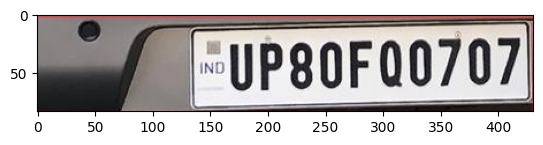

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image as a NumPy array
image_array = np.array(Image.open(image_file_path))

for i in range(len(x)):

    x1, x2 = min(x[i][0], x[i][2]), max(x[i][0], x[i][2])
    y1, y2 = min(x[i][1], x[i][3]), max(x[i][1], x[i][3])

    # Crop the image array using the floating-point coordinates
    cropped_array = image_array[int(y1):int(y2), int(x1):int(x2)]

    # Convert the cropped array back to an image
    cropped_image = Image.fromarray(cropped_array)

    # Save the cropped image with a unique filename incorporating the index i
    cropped_image.save(f"cropped_image_{i}.jpg")
    np.save(f"cropped_array_{i}.npy", cropped_array)

    # Display the cropped image
    plt.imshow(cropped_image)
    plt.show()

In [ ]:
import cv2
# Match contours to license plate or character template
def find_contours(dimensions, img) :
    plt.imshow(img)
    plt.show()
    # Find all contours in the image

    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')
    # Set the border pixels to white
    border_size = 5
    ii[:border_size+5, :] = 255  # Top border
    ii[-border_size:, :] = 255  # Bottom border
    ii[:, :border_size] = 255  # Left border
    ii[:, -border_size:] = 255  # Right border
    plt.imshow(ii)
    plt.show()
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            plt.title('Predict Segments')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)

    # Return characters on ascending order with respect to the x-coordinate (most-left character first)

    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [ ]:
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Contour')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

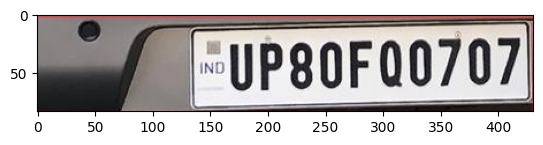

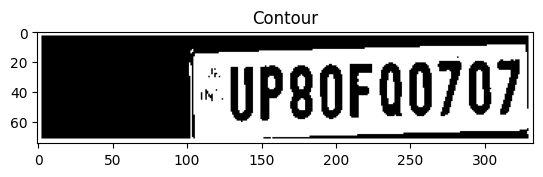

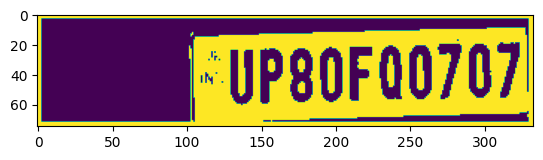

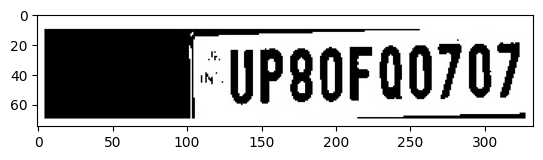

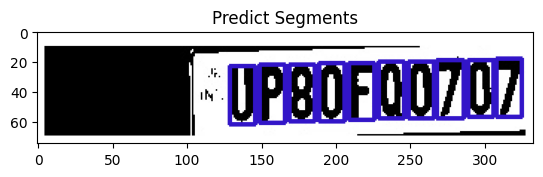

[[[          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  ...
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]]

 [[          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  ...
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]]

 [[          0          

In [ ]:
plt.imshow(cropped_image)
plt.show()
cropped_array = np.load("cropped_array_0.npy")
char=segment_characters(cropped_array)
print(char,"hi")

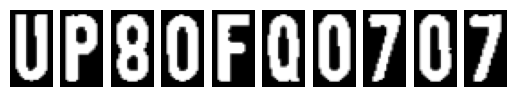

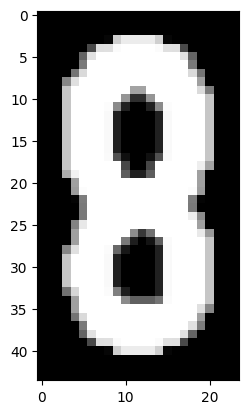

In [ ]:
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
plt.show()
plt.imshow(char[2],cmap='gray')

In [ ]:
%cd  /content/drive/MyDrive/License plate detection project/letter dataset

/content/drive/MyDrive/License plate detection project/letter dataset


LETTER RECOGNITION USING CNN

In [ ]:
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:

#preparation of dataset
import cv2
import os
X_train=[]
Y_train=[]
def read_resize_images(folder_path, target_shape=(28, 28)):
    images = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is not None:
            img_resized = cv2.resize(img, target_shape)  # Resize image
            img_flattened = img_resized.flatten()  # Flatten image into 1D array
            images.append(img_flattened)
    return np.array(images)

for i in range(10):
  folder_path = str(i)
  target_shape = (28, 28)  # Target shape for resizing

  # Read and resize images
  images_data = read_resize_images(folder_path, target_shape)
  X_train.extend(images_data)
  for j in range(len(images_data)):
     Y_train.append(i)
# Convert lists to NumPy arrays

for i in range(26):

  folder_path = chr(ord('A') + i)
  target_shape = (28, 28)  # Target shape for resizing

  # Read and resize images
  images_data = read_resize_images(folder_path, target_shape)
  X_train.extend(images_data)
  for j in range(len(images_data)):
     Y_train.append(10+i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)


# Display shape of the array
print("Shape of the array containing resized images:", X_train,X_train.shape,len(Y_train),Y_train)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #convert or normalize all values of input values bw 0 and 1
#X_test = scaler.fit_transform(X_test)
X_train=X_train.T
Y_train=Y_train.T
print(X_train)

In [ ]:
def create_params():
    """Initialise the weights and biases using Kaiming He initialisation for ReLU
    and Xavier for softmax
    """
    # Kaiming He Initialisation
    he_std = sqrt(2) / (784)
    # Xavier Initialisation
    lower, upper = -(1 / sqrt(36)), (1 / sqrt(36))

    W1 = np.random.randn(36, 784) * he_std
    b1 = np.random.randn(36, 1)
    W2 = lower + np.random.rand(36, 36) * (upper - lower)
    b2 = np.random.randn(36, 1)

    return W1, b1, W2, b2

In [ ]:
def ReLU(X):
    """ReLU function"""
    return np.maximum(0,X)

def softmax(X):
    """Softmax function"""
    e_X = np.exp(X - np.max(X))
    return e_X / e_X.sum(axis=0)

def deriv_ReLU(X):
    """Derivative of ReLU function"""
    return X > 0

def one_hot_encoder(y):
    """One Hot Encoder"""
    oh_y = np.zeros((y.size, y.max() + 1))
    oh_y[np.arange(y.size), y] = 1
    return oh_y.T

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    """Forward propagation steps"""
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W2, X, y):
    """Backwards propagation steps"""
    m = y.size
    oh_y = one_hot_encoder(y)
    dZ2 = A2 - oh_y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(pred, y):
    #print(pred, y)
    return np.sum(pred == y) / y.size

import matplotlib.pyplot as plt

def grad_descent(X, y, iterations, alpha):
    W1, b1, W2, b2 = create_params()
    accuracy_history = []  # List to store accuracy values during training
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 20 == 0:
            accuracy = get_accuracy(get_predictions(A2), y)
            accuracy_history.append(accuracy)  # Append accuracy to list
            print(f'Epoch: {i}')
            print(f'Accuracy: {accuracy}\n')
    # Plotting
    epochs = range(0, iterations, 20)  # X values (epochs)
    plt.plot(epochs, accuracy_history)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.show()
    return W1, b1, W2, b2

In [ ]:
from math import sqrt
W1, b1, W2, b2 = grad_descent(X_train, Y_train, 1000, 0.05)
#print("W1: ",W1,"W2: ",W2,"b1: ",b1,"b2: ",b2)2

In [ ]:
def model_pred(W1, b1, W2, b2, X):
    """Forward propagation steps"""
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    pred = get_predictions(A2)
    return pred

In [ ]:
# Step 2: Save the arrays as .npy files
np.save('w1.npy', W1)
np.save('w2.npy', W2)
np.save('b1.npy', b1)
np.save('b2.npy', b2)

In [ ]:
import cv2

  # Define the width and height for resizing
target_shape = (28, 28)
# Loop through the images in 'char'
output=''
for i, image_data in enumerate(char):
    # Resize the image using cv2.resize()
    img_resized = cv2.resize(image_data, target_shape)  # Resize image

    # Flatten image into 1D array
    img_flattened = img_resized.flatten()  # Flatten image into 1D array

    img_flattened = img_flattened.reshape(-1, 1)

    # Perform predictions using the model
    test_pred = model_pred(W1, b1, W2, b2, img_flattened)
    #print(type(test_pred))
    my_char=None
    if(test_pred[0]>9):
      my_char = chr(ord('A') + test_pred[0] - 10)
    else:
      my_char=str(test_pred[0])
    output+=my_char


    # Display the resized image using cv2.imshow()
    #plt.imshow(img_resized, cmap='gray')  # Display the image
    #plt.axis('off')  # Turn off axis labels
    #plt.show()
    # Print predictions and length of flattened image
    #print(my_char )

print("\nfinal predicted numer plate :",output)




final predicted numer plate : BP8QF6B7B7


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import cv2
import numpy as np
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

def detect_and_recognize_license_plate(image):
    # License plate detection
    # Your license plate detection code here
    %pip install ultralytics
    import ultralytics
    ultralytics.checks()
    #mount your google drive
    from google.colab import drive
    drive.mount('/content/drive')
    #changing directory to project directory
    %cd /content/drive/MyDrive/License plate detection project

    #changing directory to project directory
    %cd /content/drive/MyDrive/License plate detection project

    import os
    import re
    import subprocess
    from PIL import Image
    from ultralytics import YOLO

    input_path='Artificial Mercosur License Plates Dataset/train/images/cropped_parking_lot_110.JPG'
    # Execute the YOLO command to perform object detection and get the output folder path
    yolo_command = "yolo task=detect mode=predict model=runs/detect/25epoch_results/weights/best.pt conf=0.25 source='" + input_path + "' hide_labels=True line_thickness=1 "
    output = subprocess.check_output(yolo_command, shell=True).decode("utf-8")
    output_lines = output.strip().split('\n')
    output_folder = None
    for line in output_lines:
        if line.startswith("Results saved to "):
            output_folder = re.sub(r'\x1b\[[0-9;]*m', '', line[len("Results saved to "):].strip())  # Remove ANSI escape codes
            break
    if output_folder is None:
        raise ValueError("Output folder path not found in the command output.")

    print("Output folder:", output_folder)  # Print the output folder path for debugging

    # Find the image file within the output folder
    image_files = [f for f in os.listdir(output_folder) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.JPG') or f.endswith('.jpeg')]
    if not image_files:
        raise FileNotFoundError("No image files found in the output folder.")

    # Assuming there's only one image file in the folder, select the first one
    image_file_path = os.path.join(output_folder, image_files[0])

    # Open the image
    img = Image.open(image_file_path)

    # Get width and height
    width = img.width
    height = img.height

    # Load the YOLOv8 model
    model = YOLO('runs/detect/25epoch_results/weights/best.pt')

    # Perform inference on the image
    results = model(image_file_path)

    # Extract bounding boxes, classes, names, and confidences
    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    names = results[0].names
    confidences = results[0].boxes.conf.tolist()

    # Create a folder to store the results
    output_folder = "results"
    os.makedirs(output_folder, exist_ok=True)


    # Create a text file to store all the results
    output_file = os.path.join(output_folder, "all_results.txt")
    with open(output_file, "w") as f:
        # Iterate through the results
        x=[]
        for i, (box, cls, conf) in enumerate(zip(boxes, classes, confidences)):
            x.append(box)
            #x1, y1, x2, y2 = box
            confidence = conf
            detected_class = cls
            name = names[int(cls)]

            # Write the result to the file
            f.write(f"BBox: {x[i][0]},{x[i][1]},{x[i][2]},{x[i][3]}\n")

    print(f"All results stored in {output_file}")

    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt

    # Load the image as a NumPy array
    image_array = np.array(Image.open(image_file_path))

    for i in range(len(x)):

        x1, x2 = min(x[i][0], x[i][2]), max(x[i][0], x[i][2])
        y1, y2 = min(x[i][1], x[i][3]), max(x[i][1], x[i][3])

        # Crop the image array using the floating-point coordinates
        cropped_array = image_array[int(y1):int(y2), int(x1):int(x2)]

        # Convert the cropped array back to an image
        cropped_image = Image.fromarray(cropped_array)

        # Save the cropped image with a unique filename incorporating the index i
        cropped_image.save(f"cropped_image_{i}.jpg")
        np.save(f"cropped_array_{i}.npy", cropped_array)

        # Display the cropped image
        plt.imshow(cropped_image)
        plt.show()

    # Character recognition
    # Your character recognition code here

    # Predicted characters
    predicted_characters = output  # Placeholder, replace with actual predicted characters
    import cv2
    # Match contours to license plate or character template
    def find_contours(dimensions, img) :
        plt.imshow(img)
        plt.show()
        # Find all contours in the image

        cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Retrieve potential dimensions
        lower_width = dimensions[0]
        upper_width = dimensions[1]
        lower_height = dimensions[2]
        upper_height = dimensions[3]

        # Check largest 5 or  15 contours for license plate or character respectively
        cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

        ii = cv2.imread('contour.jpg')
        # Set the border pixels to white
        border_size = 10
        ii[:border_size+5, :] = 255  # Top border
        ii[-border_size:, :] = 255  # Bottom border
        ii[:, :border_size] = 255  # Left border
        ii[:, -border_size:] = 255  # Right border
        plt.imshow(ii)
        plt.show()
        x_cntr_list = []
        target_contours = []
        img_res = []
        for cntr in cntrs :
            # detects contour in binary image and returns the coordinates of rectangle enclosing it
            intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

            # checking the dimensions of the contour to filter out the characters by contour's size
            if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
                x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

                char_copy = np.zeros((44,24))
                # extracting each character using the enclosing rectangle's coordinates.
                char = img[intY:intY+intHeight, intX:intX+intWidth]
                char = cv2.resize(char, (20, 40))

                cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
                plt.imshow(ii, cmap='gray')
                plt.title('Predict Segments')

                # Make result formatted for classification: invert colors
                char = cv2.subtract(255, char)

                # Resize the image to 24x44 with black border
                char_copy[2:42, 2:22] = char
                char_copy[0:2, :] = 0
                char_copy[:, 0:2] = 0
                char_copy[42:44, :] = 0
                char_copy[:, 22:24] = 0

                img_res.append(char_copy) # List that stores the character's binary image (unsorted)

        # Return characters on ascending order with respect to the x-coordinate (most-left character first)

        plt.show()
        # arbitrary function that stores sorted list of character indeces
        indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
        img_res_copy = []
        for idx in indices:
            img_res_copy.append(img_res[idx])# stores character images according to their index
        img_res = np.array(img_res_copy)

        return img_res
    # Find characters in the resulting images
    def segment_characters(image) :

        # Preprocess cropped license plate image
        img_lp = cv2.resize(image, (333, 75))
        img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
        _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_binary_lp = cv2.erode(img_binary_lp, (3,3))
        img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

        LP_WIDTH = img_binary_lp.shape[0]
        LP_HEIGHT = img_binary_lp.shape[1]

        # Make borders white
        img_binary_lp[0:3,:] = 255
        img_binary_lp[:,0:3] = 255
        img_binary_lp[72:75,:] = 255
        img_binary_lp[:,330:333] = 255

        # Estimations of character contours sizes of cropped license plates
        dimensions = [LP_WIDTH/6,
                          LP_WIDTH/2,
                          LP_HEIGHT/10,
                          2*LP_HEIGHT/3]
        plt.imshow(img_binary_lp, cmap='gray')
        plt.title('Contour')
        plt.show()
        cv2.imwrite('contour.jpg',img_binary_lp)

        # Get contours within cropped license plate
        char_list = find_contours(dimensions, img_binary_lp)

        return char_list
    plt.imshow(cropped_image)
    plt.show()
    cropped_array = np.load("cropped_array_0.npy")
    char=segment_characters(cropped_array)
    print(char,"hi")
    for i in range(len(char)):
        plt.subplot(1, len(char), i+1)
        plt.imshow(char[i], cmap='gray')
        plt.axis('off')
    plt.show()
    plt.imshow(char[2],cmap='gray')

    %cd  /content/drive/MyDrive/License plate detection project/letter dataset
    from math import sqrt
    from sklearn.preprocessing import MinMaxScaler


    #preparation of dataset
    import cv2
    import os
    X_train=[]
    Y_train=[]
    def read_resize_images(folder_path, target_shape=(28, 28)):
        images = []
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            if img is not None:
                img_resized = cv2.resize(img, target_shape)  # Resize image
                img_flattened = img_resized.flatten()  # Flatten image into 1D array
                images.append(img_flattened)
        return np.array(images)

    for i in range(10):
      folder_path = str(i)
      target_shape = (28, 28)  # Target shape for resizing

      # Read and resize images
      images_data = read_resize_images(folder_path, target_shape)
      X_train.extend(images_data)
      for j in range(len(images_data)):
        Y_train.append(i)
    # Convert lists to NumPy arrays

    for i in range(26):

      folder_path = chr(ord('A') + i)
      target_shape = (28, 28)  # Target shape for resizing

      # Read and resize images
      images_data = read_resize_images(folder_path, target_shape)
      X_train.extend(images_data)
      for j in range(len(images_data)):
        Y_train.append(10+i)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)


    # Display shape of the array
    print("Shape of the array containing resized images:", X_train,X_train.shape,len(Y_train),Y_train)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train) #convert or normalize all values of input values bw 0 and 1
    #X_test = scaler.fit_transform(X_test)
    X_train=X_train.T
    Y_train=Y_train.T
    print(X_train)

    def create_params():
        """Initialise the weights and biases using Kaiming He initialisation for ReLU
        and Xavier for softmax
        """
        # Kaiming He Initialisation
        he_std = sqrt(2) / (784)
        # Xavier Initialisation
        lower, upper = -(1 / sqrt(36)), (1 / sqrt(36))

        W1 = np.random.randn(36, 784) * he_std
        b1 = np.random.randn(36, 1)
        W2 = lower + np.random.rand(36, 36) * (upper - lower)
        b2 = np.random.randn(36, 1)

        return W1, b1, W2, b2

    def ReLU(X):
        """ReLU function"""
        return np.maximum(0,X)

    def softmax(X):
        """Softmax function"""
        e_X = np.exp(X - np.max(X))
        return e_X / e_X.sum(axis=0)

    def deriv_ReLU(X):
        """Derivative of ReLU function"""
        return X > 0

    def one_hot_encoder(y):
        """One Hot Encoder"""
        oh_y = np.zeros((y.size, y.max() + 1))
        oh_y[np.arange(y.size), y] = 1
        return oh_y.T

    def forward_prop(W1, b1, W2, b2, X):
        """Forward propagation steps"""
        Z1 = W1.dot(X) + b1
        A1 = ReLU(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = softmax(Z2)
        return Z1, A1, Z2, A2

    def back_prop(Z1, A1, Z2, A2, W2, X, y):
        """Backwards propagation steps"""
        m = y.size
        oh_y = one_hot_encoder(y)
        dZ2 = A2 - oh_y
        dW2 = (1 / m) * dZ2.dot(A1.T)
        db2 = (1 / m) * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
        dW1 = (1 / m) * dZ1.dot(X.T)
        db1 = (1 / m) * np.sum(dZ1)
        return dW1, db1, dW2, db2

    def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        return W1, b1, W2, b2

    def get_predictions(A2):
        return np.argmax(A2, axis=0)

    def get_accuracy(pred, y):
        #print(pred, y)
        return np.sum(pred == y) / y.size

    def grad_descent(X, y, iterations, alpha):
        W1, b1, W2, b2 = create_params()
        for i in range(iterations):
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            if i % 20 == 0:
                print(f'Epoch: {i}')
                print(f'Accuracy: {get_accuracy(get_predictions(A2), y)}\n')
        return W1, b1, W2, b2


    from math import sqrt
    W1, b1, W2, b2 = grad_descent(X_train, Y_train, 500, 0.05)
    #print("W1: ",W1,"W2: ",W2,"b1: ",b1,"b2: ",b2)


    def model_pred(W1, b1, W2, b2, X):
        """Forward propagation steps"""
        Z1 = W1.dot(X) + b1
        A1 = ReLU(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = softmax(Z2)
        pred = get_predictions(A2)
        return pred
    import cv2

      # Define the width and height for resizing
    target_shape = (28, 28)
    # Loop through the images in 'char'
    output=''
    for i, image_data in enumerate(char):
        # Resize the image using cv2.resize()
        img_resized = cv2.resize(image_data, target_shape)  # Resize image

        # Flatten image into 1D array
        img_flattened = img_resized.flatten()  # Flatten image into 1D array

        img_flattened = img_flattened.reshape(-1, 1)

        # Perform predictions using the model
        test_pred = model_pred(W1, b1, W2, b2, img_flattened)
        #print(type(test_pred))
        my_char=None
        if(test_pred[0]>9):
          my_char = chr(ord('A') + test_pred[0] - 10)
        else:
          my_char=str(test_pred[0])
        output+=my_char


        # Display the resized image using cv2.imshow()
        #plt.imshow(img_resized, cmap='gray')  # Display the image
        #plt.axis('off')  # Turn off axis labels
        #plt.show()
        # Print predictions and length of flattened image
        #print(my_char )

    print("\nfinal predicted numer plate :",output)


    return cropped_image, predicted_characters

# Create Gradio interface
interface = gr.Interface(
    fn=detect_and_recognize_license_plate,
    inputs="image",
    outputs=["image", "text"],
    title="License Plate Detection and Character Recognition",
    description="Upload an image containing a license plate for detection and character recognition."
)

# Launch the interface
interface.launch()
